In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
# 2. Download and Load dataset
!wget -O RetailX_CustomerData.csv https://raw.githubusercontent.com/contrecesar/Automatizacion-2025-1/main/JesusChacon-MachineLearningModelsScikit-Learn/RetailX_CustomerData.csv

df = pd.read_csv("RetailX_CustomerData.csv")
df.head()

--2025-07-31 18:44:47--  https://raw.githubusercontent.com/contrecesar/Automatizacion-2025-1/main/JesusChacon-MachineLearningModelsScikit-Learn/RetailX_CustomerData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33545 (33K) [text/plain]
Saving to: ‘RetailX_CustomerData.csv’

RetailX_CustomerDat 100%[===================>]  32.76K  --.-KB/s    in 0.004s  

2025-07-31 18:44:47 (7.48 MB/s) - ‘RetailX_CustomerData.csv’ saved [33545/33545]



,CustomerID,Region,ProductCategory,TotalSpent,VisitsPerMonth,LastPurchaseDays,Churn
0,1000,East,Clothing,535.54,3,53,0
1,1001,West,Home,232.93,2,242,0
2,1002,North,Electronics,576.04,1,132,0
3,1003,East,Electronics,622.12,0,364,0
4,1004,East,Electronics,611.96,1,112,1


In [4]:
# 3. Data overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        1000 non-null   int64  
 1   Region            1000 non-null   object 
 2   ProductCategory   1000 non-null   object 
 3   TotalSpent        1000 non-null   float64
 4   VisitsPerMonth    1000 non-null   int64  
 5   LastPurchaseDays  1000 non-null   int64  
 6   Churn             1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB
None
        CustomerID   TotalSpent  VisitsPerMonth  LastPurchaseDays        Churn
count  1000.000000  1000.000000     1000.000000       1000.000000  1000.000000
mean   1499.500000   520.533810        2.938000        187.952000     0.262000
std     288.819436   195.789997        1.654356        104.253242     0.439943
min    1000.000000     0.120000        0.000000          1.000000     0.000000
25%    12

In [5]:
# 4. Check for missing values
print(df.isnull().sum())

CustomerID          0
Region              0
ProductCategory     0
TotalSpent          0
VisitsPerMonth      0
LastPurchaseDays    0
Churn               0
dtype: int64


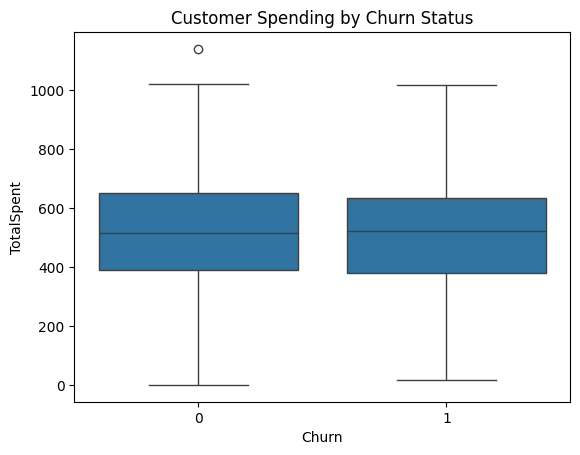

In [6]:
# 5. Visualization: Spending by churn
sns.boxplot(x="Churn", y="TotalSpent", data=df)
plt.title("Customer Spending by Churn Status")
plt.show()

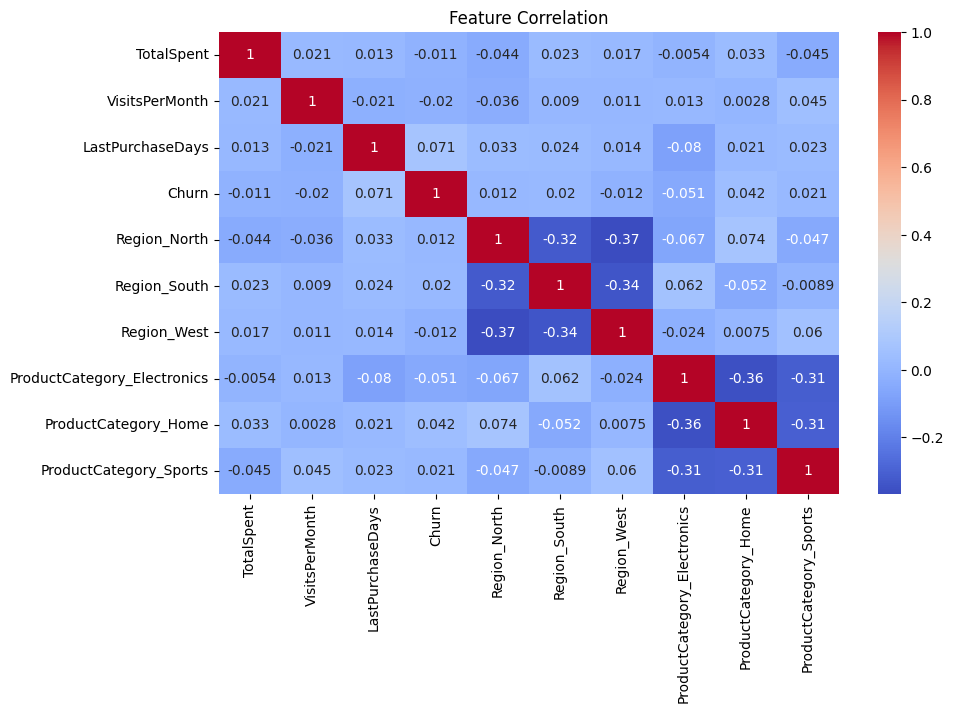

In [9]:
# 6. Correlation heatmap
plt.figure(figsize=(10, 6))

df_corr = pd.get_dummies(df.drop(columns=["CustomerID"]), drop_first=True)

sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [10]:
# 7. Preprocessing
df_encoded = pd.get_dummies(df, columns=["Region", "ProductCategory"], drop_first=True)
X = df_encoded.drop(columns=["CustomerID", "Churn"])
y = df_encoded["Churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 8. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 9. Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']  # balance class weights to handle imbalance
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

In [ ]:
# 10. Evaluation
print("Best parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       221
           1       0.47      0.11      0.18        79

    accuracy                           0.73       300
   macro avg       0.61      0.53      0.51       300
weighted avg       0.68      0.73      0.67       300

Accuracy: 0.7333333333333333
ROC AUC: 0.5343375909273155


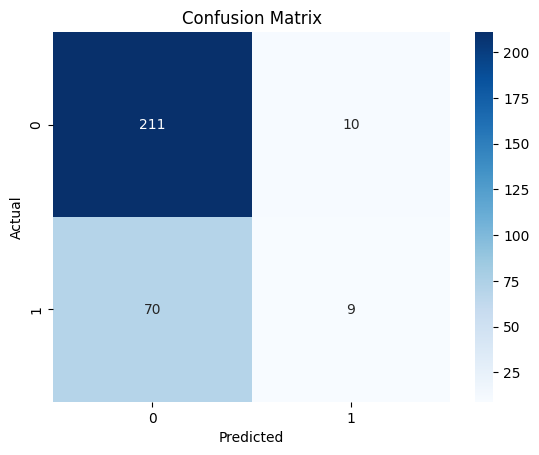

In [14]:
# 11. Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# 12. Feature importance
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


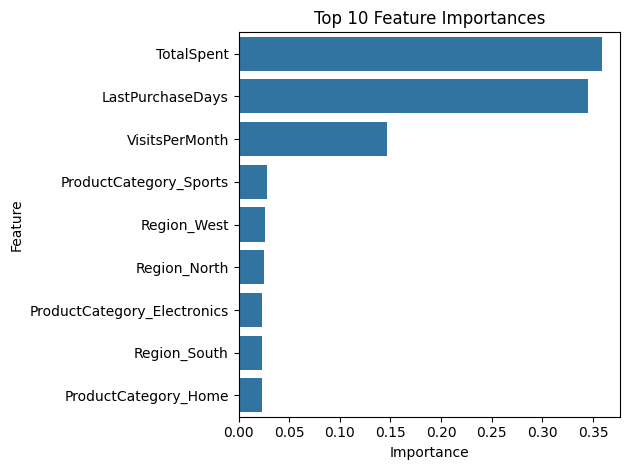

In [16]:
# 13. Plot top 10 features
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()